# <span style="color:darkblue"> QTM 151 - Final Project </span>

<font size="4"> 

Virginia Cano, Hanna Florence, Angelina Lee, Chloe Zhao

<font size = "5">

Importing relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf 

<font size = "5">

Introduction


<font size = "4">
QUESTION: How do lap times vary across circuits?

<font size = "3">

#Hannah

A markdown text with 1-2 paragraph that summarize the main goals of the project. The first paragraph should briefly describe what Formula 1 is, what question you’re interested in, and why it is relevant. The introduction should end with a high-level description of the results and the coming structure of the project. Try to make the text self-contained, intended for someone who isn’t familiar with Formula 1 or the dataset.


<font size = "5">

Data Description

<font size = "3">

We will be using the following tables to examine the research question

<font size = "5">

Circuits table:

<font size = "3">

The file circuits.csv contains information on Formula One racing circuits around the world. Its codebook is:

<img src="figures/codebook_circuits.png" alt="drawing" width="500"/>

It is important to note that the variables of interest for our project are "circuitId", "name", and "country".

<font size = "5">

Races table:

<font size = "3">

The file races.csv contains information on Formula One races that have taken place since 1950. Its codebook is:

<img src="figures/codebook_races.png" alt="drawing" width="500"/>

It is important to note that the variables of interest for our project are "circuitId", "raceId", and "year".

<font size = "5">

Results table:

<font size = "3">

The results.csv file contains data on the results of Formula One races. Its codebook is:

<img src="figures/codebook_results.png" alt="drawing" width="500"/>   

It is important to note that the variables of interest for our project are "circuitId", "milliseconds", and "fastestLapSpeed".

In [8]:
# here is code for importing data
circuits = pd.read_csv("data_raw/circuits.csv")
circuit_subset = circuits[["circuitId", "name", "country"]]

races = pd.read_csv("data_raw/races.csv")
races_subset = races[["circuitId", "raceId", "year"]]

results = pd.read_csv("data_raw/results.csv")
results_subset = results[["raceId", "milliseconds", "fastestLapSpeed"]]


<font size = "5">

Merging data

<font size = "3">

Write a paragraph in markdown describing any merging procedures: 


In [9]:
# here is code for merging

#merging circuits and races
first_merge = pd.merge(circuit_subset,
                         races_subset,
                         on = "circuitId",
                         how = "left")

#merging new data set with results
final_merge = pd.merge(first_merge,
                         results_subset,
                         on = "raceId",
                         how = "left")

<font size = "5">

Data Cleaning 

<font size = "3">

Write a paragraph in markdown summarizing data cleaning procedures:


In [10]:
#Here is code for data cleaning

#checking data types of all variables
print(final_merge.dtypes)

#cleaning milliseconds variable
subset = final_merge.query("milliseconds.str.isnumeric() == False")
list_unique = pd.unique(subset["milliseconds"])
print(list_unique)

final_merge["milliseconds"] = final_merge["milliseconds"].replace('\\N', np.nan,)
final_merge["milliseconds"] = pd.to_numeric(final_merge["milliseconds"])

#print(final_merge.dtypes)

#cleaning fastest lap speed
final_merge["fastestLapSpeed"] = final_merge["fastestLapSpeed"].replace('\\N', np.nan,)
final_merge["fastestLapSpeed"] = pd.to_numeric(final_merge["fastestLapSpeed"])

print(final_merge.dtypes)

circuitId           int64
name               object
country            object
raceId              int64
year                int64
milliseconds       object
fastestLapSpeed    object
dtype: object
['\\N']
circuitId            int64
name                object
country             object
raceId               int64
year                 int64
milliseconds       float64
fastestLapSpeed    float64
dtype: object


<font size = "5">

Describing our data

<font size = "3">

Write a paragraph describing your main columns: 
- circuitID
- millisecond
- fastestLapSpeed
- Year

In [11]:
results_agg = final_merge.agg(mean_milliseconds = ('milliseconds','mean'),
                          min_milliseconds =  ('milliseconds','min'),
                          max_milliseconds =  ('milliseconds','max'),
                          mean_fastestLapSpeed = ('fastestLapSpeed','mean'),
                          min_fastestLapSpeed =  ('fastestLapSpeed','min'),
                          max_fastestLapSpeed =  ('fastestLapSpeed','max'),
                         count_obs   = ('circuitId',len))

display(results_agg)

,milliseconds,fastestLapSpeed,circuitId
mean_milliseconds,6.231870e+06,NaN,NaN
min_milliseconds,2.070710e+05,NaN,NaN
max_milliseconds,1.509054e+07,NaN,NaN
mean_fastestLapSpeed,NaN,203.089214,NaN
min_fastestLapSpeed,NaN,89.540000,NaN
max_fastestLapSpeed,NaN,257.320000,NaN
count_obs,NaN,NaN,25863.0


<font size = "5">

Results

<font size = "3">

This should contain a combination of code to produce tables/plots and
markdown text explaining what the findings are.
o Be creative! The idea is to understand the relationship between different sets of
columns to answer an interesting question about the data.



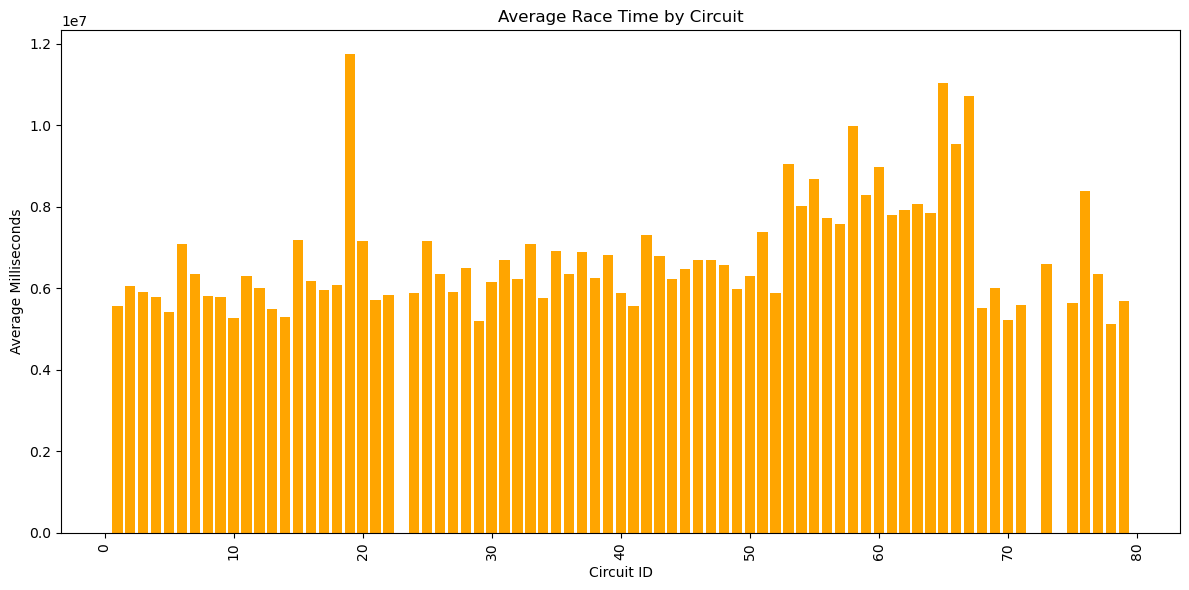

In [12]:
# We probably need a couple of code chunks

# circuits and average milliseconds (plot)
avg_milliseconds = final_merge.groupby('circuitId')['milliseconds'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_milliseconds['circuitId'], avg_milliseconds['milliseconds'], color='orange')
plt.title('Average Race Time by Circuit')
plt.xlabel('Circuit ID')
plt.ylabel('Average Milliseconds')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<font size = "4">

Average Race Time by Circuit Analysis

<font size = "3">

The bar graph showing average race time by circuit reveals insights into the characteristics of the different racing circuits. From the bar graph, we can see that the circuits with the highest average race times are circuits 19 (Indianapolis), 65 (Pescara), and 67 (Pedralbes). These circuits have certain characteristics that contribute to their longer durations. Circuit 65, Pescara, located in Italy, is known for its challenging layout with winding public roads, long straights, and tight corners. Circuit 67, Pedralbes, located in Barcelona, is known for its fast layout through public roads. Circuit 19, Indianapolis Motor Speedway, located in the US, is known for its long straights and banked corners. The intricacies of these circuits and their need for precision driving are factors that contribute to their longer race times. Conversely, from the plot, we can see that the circuits with the lowest average race times are circuits 29 (Adelaide), 78 (Losail), and 70 (Red Bull Ring). Circuit 29, Adelaide Street Circuit, located in Australia, is known for its short lap length and twisty street, making it difficult for drivers to have overtaking opportunities. Circuit 78, Losail International Circuit, located in Qatar, is known for its fast layout and smooth surface. Circuit 70, Red Bull Ring, located in Austria, is known for its short lap length and fast, sweeping corners. The bar graph gives better insight into which circuits produce the fastest and slowest average race times. By then analyzing the characteristics of those circuits, we can determine which circuit characteristics lead to faster average race times.


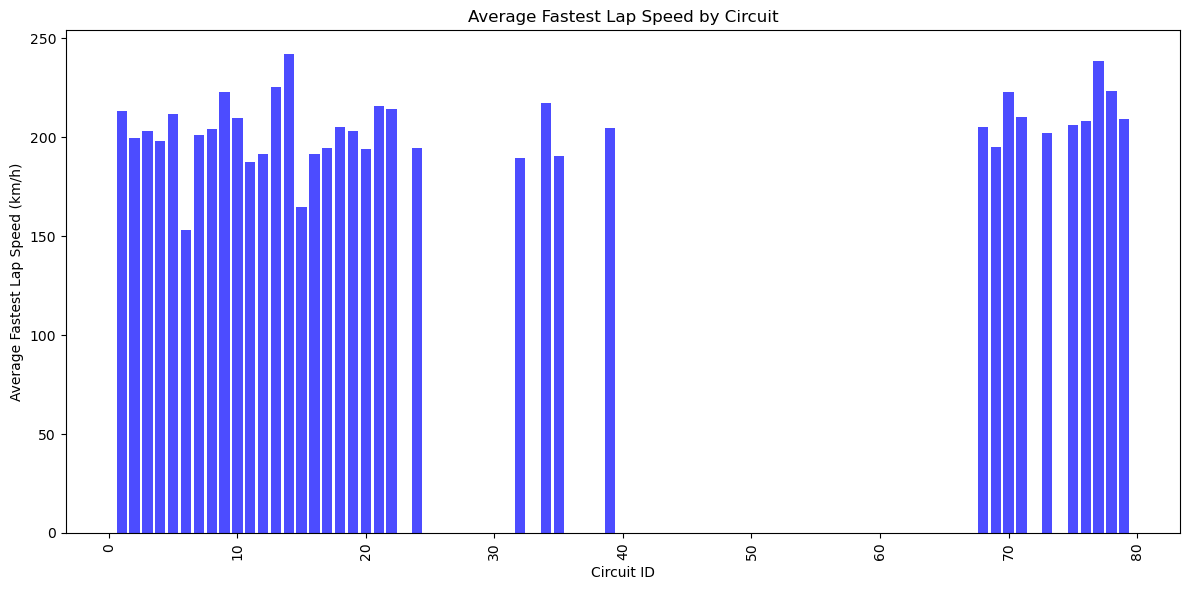

In [13]:
# circuits and average fastest time (plot)

avg_fastest_speed = final_merge.groupby('circuitId')['fastestLapSpeed'].mean()
plt.figure(figsize=(12, 6))
plt.bar(avg_fastest_speed.index, avg_fastest_speed, color='blue', alpha=0.7)
plt.title('Average Fastest Lap Speed by Circuit')
plt.xlabel('Circuit ID')
plt.ylabel('Average Fastest Lap Speed (km/h)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<font size = "4">

Average Fastest Lap Speed by Circuit Analysis

<font size = "3">

The bar graph of average fastest lap speed by circuit serves as a valuable tool for both the technical aspects of racing. From the bar graph, we can see Circuit 6 (Monaco) has the lowest average fastest lap speed, while Circuit 14 (Monza) has the highest. Monaco's low average fastest lap speed is a result of its tight and twisty street circuit layout, with narrow streets and many tight corners that limit the speed at which cars can drive. Monza's high average fastest lap speed is a result of its high-speed layout, with long straights and fast corners. This bar graph is important as it provides valuable information into the performance and characteristics of different racing circuits. It allows racing teams, engineers, and the drivers to understand the nature of each circuit in terms of speed and performance. For teams and engineers, this information is crucial for developing race strategies, optimizing car setups, and figuring out the most effective driving techniques for each circuit.


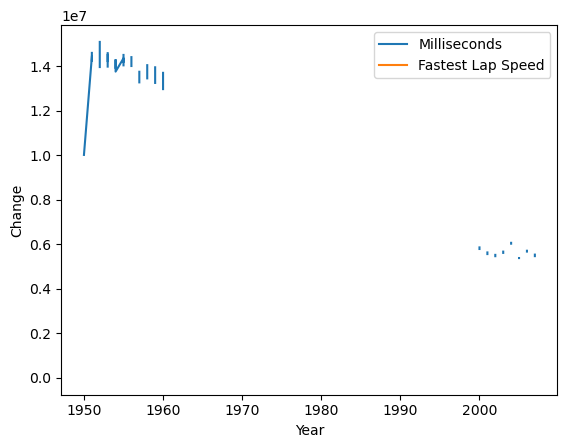

In [30]:
# Circuits across time

#Plots highest
# 19, 65, 67, 14
#Plots lowest
#29, 78, 70, 6

data_1 = final_merge.query('circuitId == 19')

# Write your own code
data_1[["year","milliseconds","fastestLapSpeed"]].set_index("year").plot()
plt.xlabel("Year")
plt.ylabel("Change") #idk what to title this
plt.legend(["Milliseconds","Fastest Lap Speed"])


<font size = "4">

Last Analysis

<font size = "3">

XZZ

<font size = "5">

Discussion

<font size = "3">


 Provide a brief 1 paragraph markdown chunk summarizing your findings. Describe the main things you learned from the data.